**Q1:** 
a) Find the optimum number of principal components for the features in the above-mentioned data.

b) Use any two regression models of your choice and find the prediction accuracy and error between the reduced data (with an optimum number of principal components) and the complete data.

In [1]:
from pandas import  read_csv, DataFrame,options
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from numpy import argmax, unique
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import  heatmap
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
diabetes_data = read_csv('content/diabetes.csv')

diabetes_target_data = diabetes_data['Outcome']

diabetes_data = diabetes_data.drop(columns=['Outcome'])

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##### Creating corelation matrix to understand the relationship between features

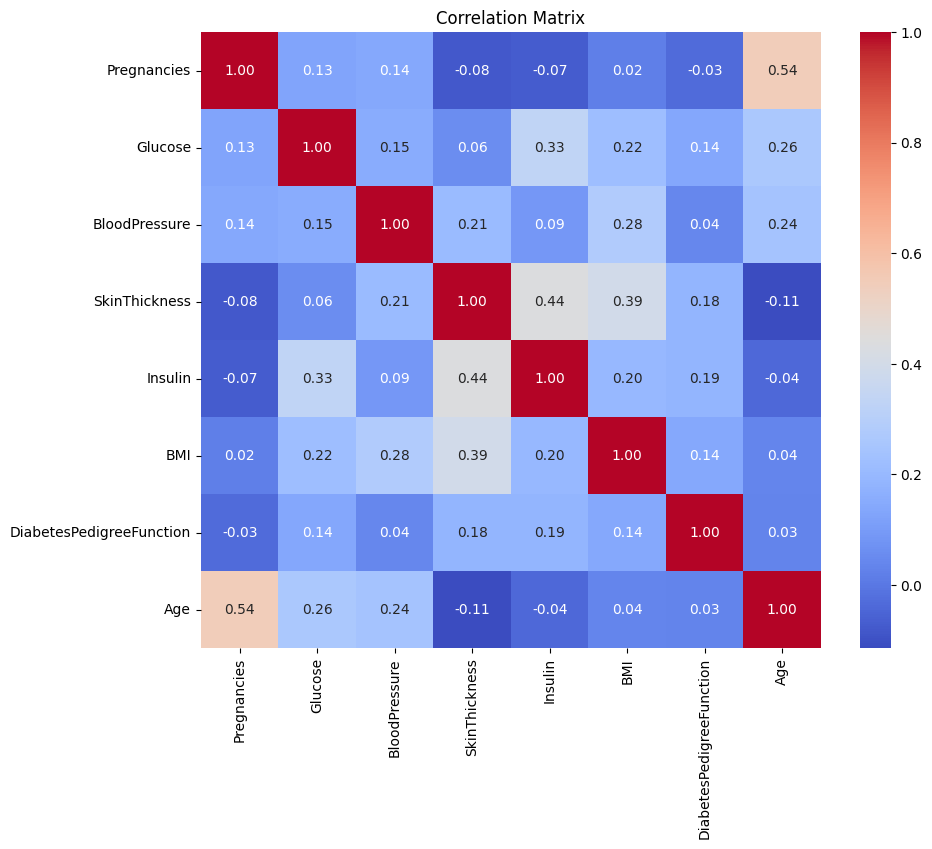

In [4]:
correlation_matrix = diabetes_data.corr()

plt.figure(figsize=(10, 8))
heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
diab_train_data, diab_test_data, diab_train_target_data, diab_test_target_data = train_test_split(diabetes_data, diabetes_target_data, test_size=0.2, random_state=42)

diab_train_data.shape, diab_test_data.shape, diab_train_target_data.shape, diab_test_target_data.shape

((614, 8), (154, 8), (614,), (154,))

#### a) Find the optimum number of principal components for the features in the above-mentioned data.


[0.89331491 0.95430344 0.97741413 0.98968335 0.99659633 0.99951133
 0.999993   1.        ]
Optimal number of components for 95% variance: 2


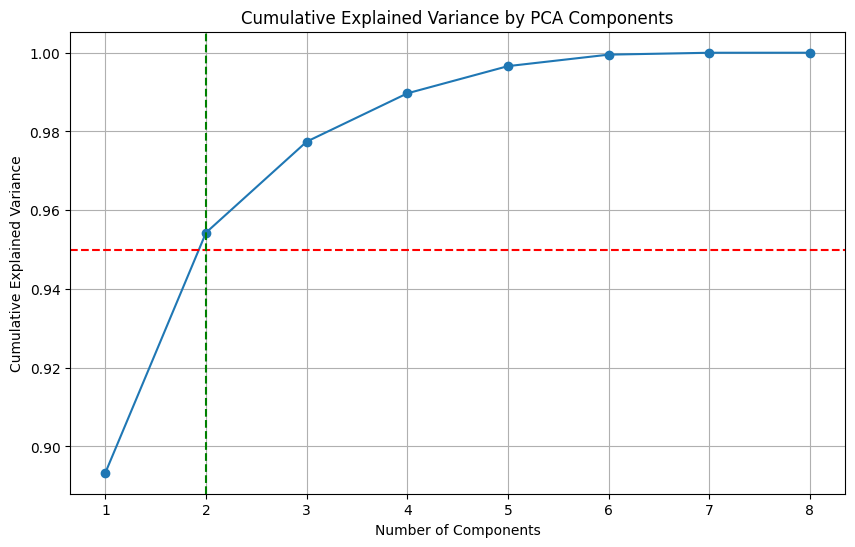

In [6]:
pca = PCA(n_components=8,)
pca.fit(diab_train_data)

diabetes_cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print(diabetes_cumulative_variance)
optimal_k = np.argmax(diabetes_cumulative_variance >= 0.95) + 1
print(f"Optimal number of components for 95% variance: {optimal_k}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(diabetes_cumulative_variance) + 1), diabetes_cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=optimal_k, color='g', linestyle='--')
plt.grid()
plt.show()


##### Hence the optimal number of componenets for the diabetes dataset is 2

In [7]:
pca = PCA(n_components=optimal_k)
pca_diab_data = pca.fit_transform(diab_train_data)

pca_diab_data.shape

(614, 2)

#### b) Use any two regression models of your choice and find the prediction accuracy and error between the reduced data (with an optimum number of principal components) and the complete data.

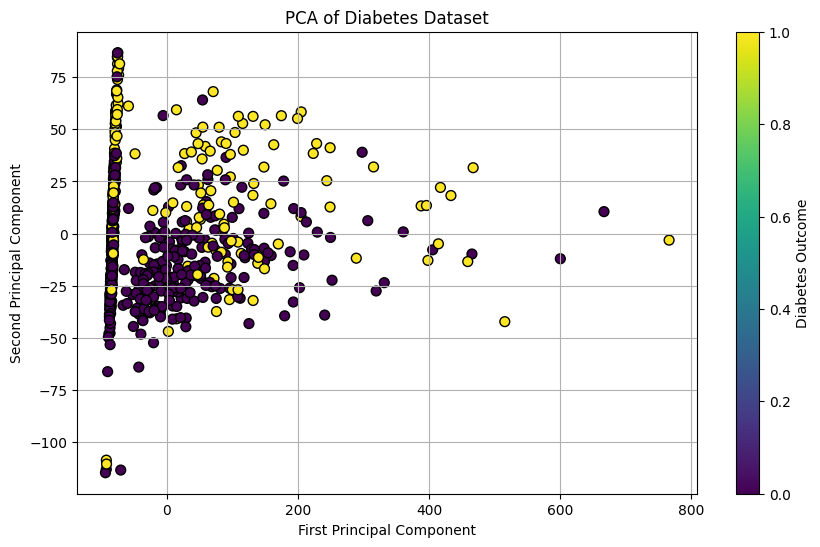

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_diab_data[:, 0], pca_diab_data[:, 1], c=diab_train_target_data, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Diabetes Outcome')
plt.grid()
plt.show()

##### First regression model we are using is logistic regresssion reason for choosing this model is as it has some linear dependency in the data which we found from correlation matrix, then logistic regression will give us a better probablities of diabetic status

Best Parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.7337662337662337


/Users/fastasturtle/Documents/MTech/Assignment/ML/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fastasturtle/Documents/MTech/Assignment/ML/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fastasturtle/Documents/MTech/Assignment/ML/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/fastasturtle/Documents/MTech/Assignment/ML/.venv

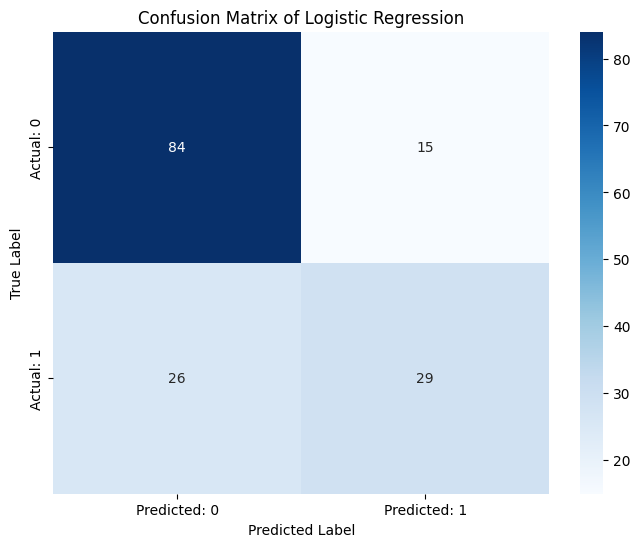

In [9]:
grid_param = {
    'C': [0.1, 0.001],
    'penalty': ['l2', 'none'],  
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [100]
}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, grid_param, scoring='accuracy', cv=5)
grid_search.fit(pca.transform(diab_train_data), diab_train_target_data)

best_model = grid_search.best_estimator_
diab_status_prediction = best_model.predict(pca.transform(diab_test_data))
test_accuracy = accuracy_score(diab_test_target_data, diab_status_prediction)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", test_accuracy)

lr_classification_report = classification_report(diab_test_target_data, diab_status_prediction,output_dict=True)

conf_matrix = confusion_matrix(diab_test_target_data, diab_status_prediction)

plt.figure(figsize=(8, 6))
heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### Second regression model which is Support Vector Machine Rationale behind using support machine is due to linear dependencies in the data which we got by looking at correlation matrix, so svm will create a boundary and gives us good classification accuracy

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10,random_state=42)
svm.fit(pca_diab_data, diab_train_target_data)
svm_diab_pred = svm.predict(pca.transform(diab_test_data))

test_accuracy = accuracy_score(diab_test_target_data, svm_diab_pred)
print("SVM Test Accuracy:", test_accuracy)

SVM Test Accuracy: 0.7467532467532467


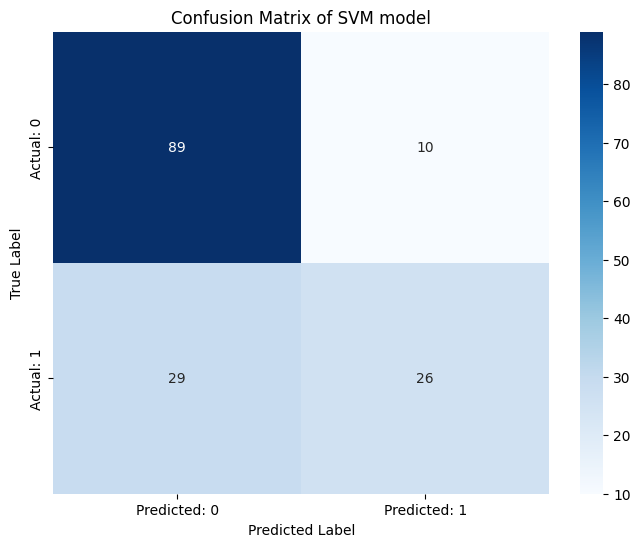

In [11]:
conf_matrix = confusion_matrix(diab_test_target_data, svm_diab_pred)
svm_classification_report = classification_report(diab_test_target_data, svm_diab_pred,output_dict=True)

plt.figure(figsize=(8, 6))
heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title("Confusion Matrix of SVM model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Comparison between classification report of Logistic Regression and SVM model

<Figure size 600x400 with 0 Axes>

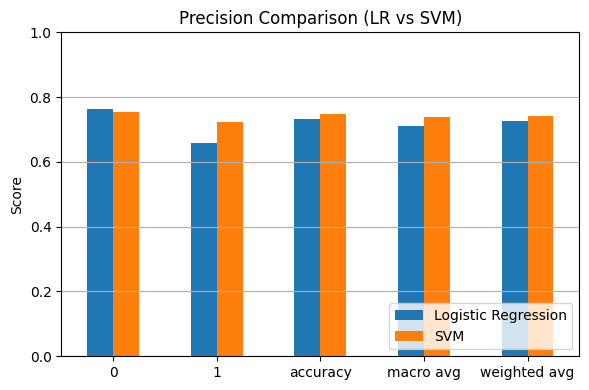

<Figure size 600x400 with 0 Axes>

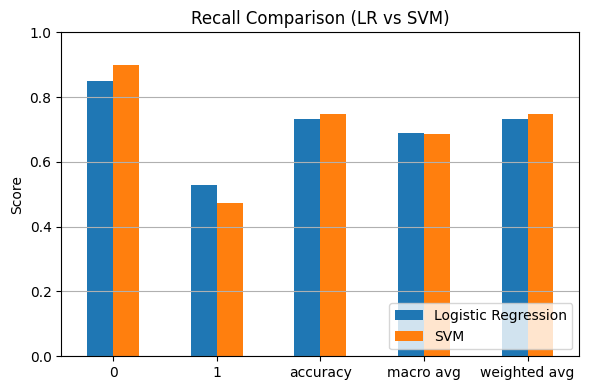

<Figure size 600x400 with 0 Axes>

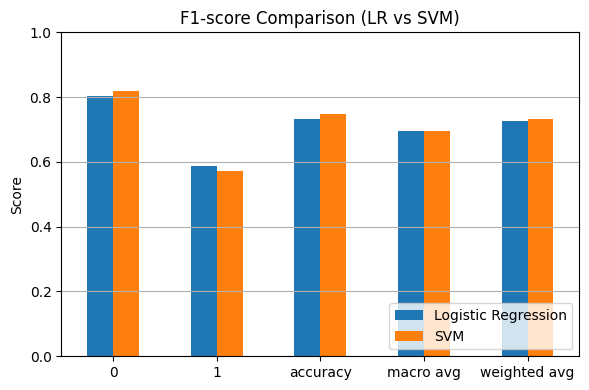

#### Q2: We will use the fashion-MNIST dataset for this question (you can download it from any other source also including libraries). Flatten and preprocess the data (if required) before starting the tasks. It will become a 784-dimensional data with 10 classes, more details are available in the link.
#### a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.
#### b) Visualize the cluster centers of each cluster as 2D images of all clusters.
#### c) Visualize 10 images corresponding to each cluster.
#### d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.
#### e) Visualize 10 images corresponding to each cluster.
#### f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering

In [13]:

fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

In [14]:
fashion_mnist.data

train_data = fashion_mnist.data[:60000]

train_data.shape

(60000, 784)

##### we will be segregating the label data and image data over here

In [15]:
image_train_data = train_data.astype('uint8')

image_train_data.shape


(60000, 784)

#### Performing a transformation

In [16]:
pca = PCA(n_components=784).fit(image_train_data)

scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(image_train_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#### Finding the cumulative variance so that with less no of dimension we can hold maximum variance

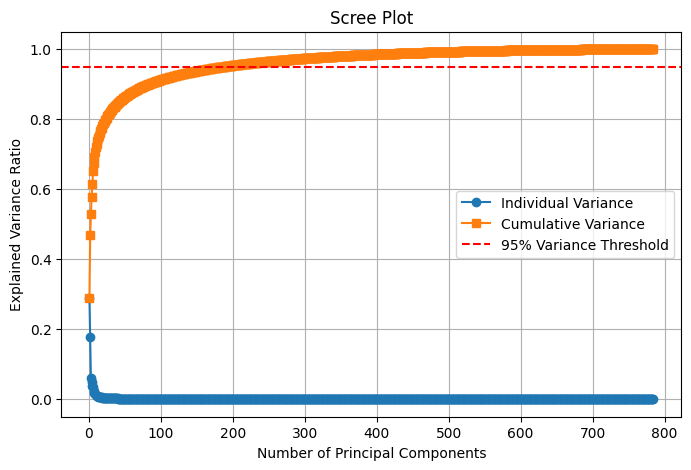

Optimal number of components (k) for 95% variance: 187


In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

optimal_k = argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components (k) for 95% variance: {optimal_k}")

##### Now we have got the optimal point where we have a 95% variance we will configure the pca components to 187 and then transformed the data

In [18]:
pca = PCA(n_components=optimal_k)
pca_train_data = pca.fit_transform(scaled_data)

pca_train_data.shape

(60000, 187)

#### a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.

In [19]:

kmeans = KMeans(n_clusters=10, init='random',n_init=10, random_state=42).fit(pca_train_data)
predicted_random_data = kmeans.predict(pca_train_data)

cluster_labels,cluster_counts = unique(predicted_random_data,return_counts=True)

for cluster_label, cluster_count in zip(cluster_labels, cluster_counts):
    print(f"Cluster {cluster_label}: {cluster_count} samples")



Cluster 0: 2898 samples
Cluster 1: 9619 samples
Cluster 2: 7392 samples
Cluster 3: 4294 samples
Cluster 4: 9077 samples
Cluster 5: 2571 samples
Cluster 6: 2346 samples
Cluster 7: 7467 samples
Cluster 8: 6574 samples
Cluster 9: 7762 samples


#### b) Visualize the cluster centers of each cluster as 2D images of all clusters.

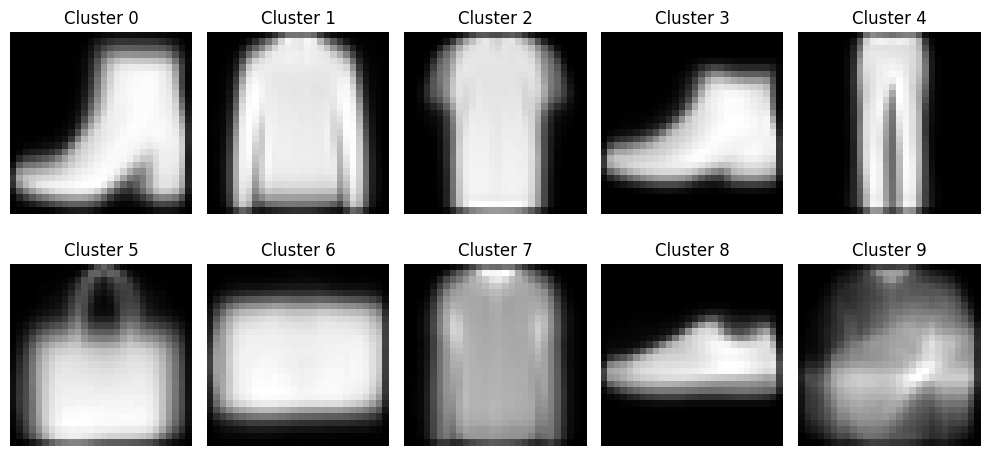

In [20]:
cluster_centers = kmeans.cluster_centers_

centre_image_data = pca.inverse_transform(cluster_centers)
centre_image_data = scaler.inverse_transform(centre_image_data)
centre_image_data = centre_image_data.reshape(-1, 28, 28).astype('uint8')
plt.figure(figsize=(10, 5))
for i in range(len(cluster_centers)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centre_image_data[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i}')
plt.tight_layout()
plt.show()

In [21]:
predicted_random_data[:10]

array([0, 2, 9, 7, 4, 1, 8, 1, 9, 9], dtype=int32)

#### c) Visualize 10 images corresponding to each cluster.

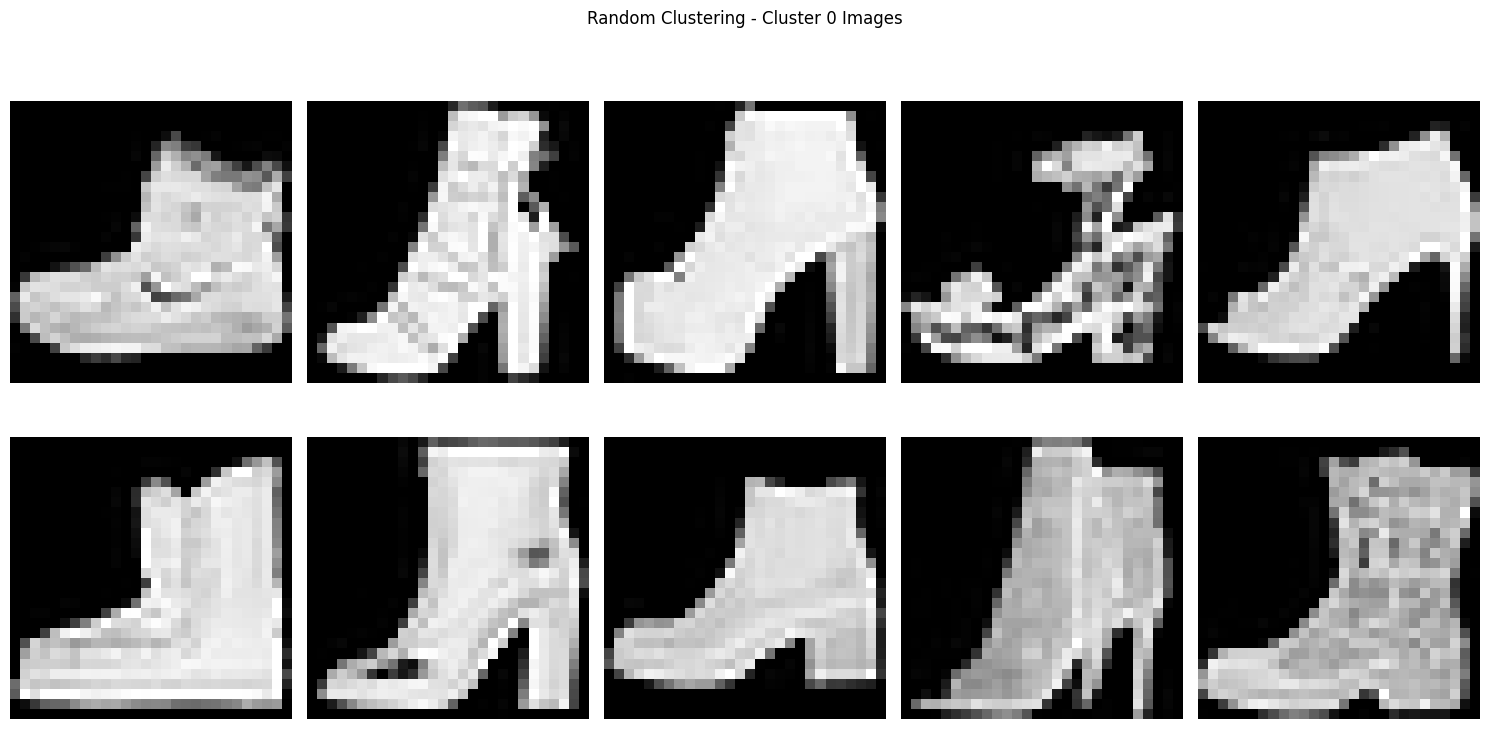

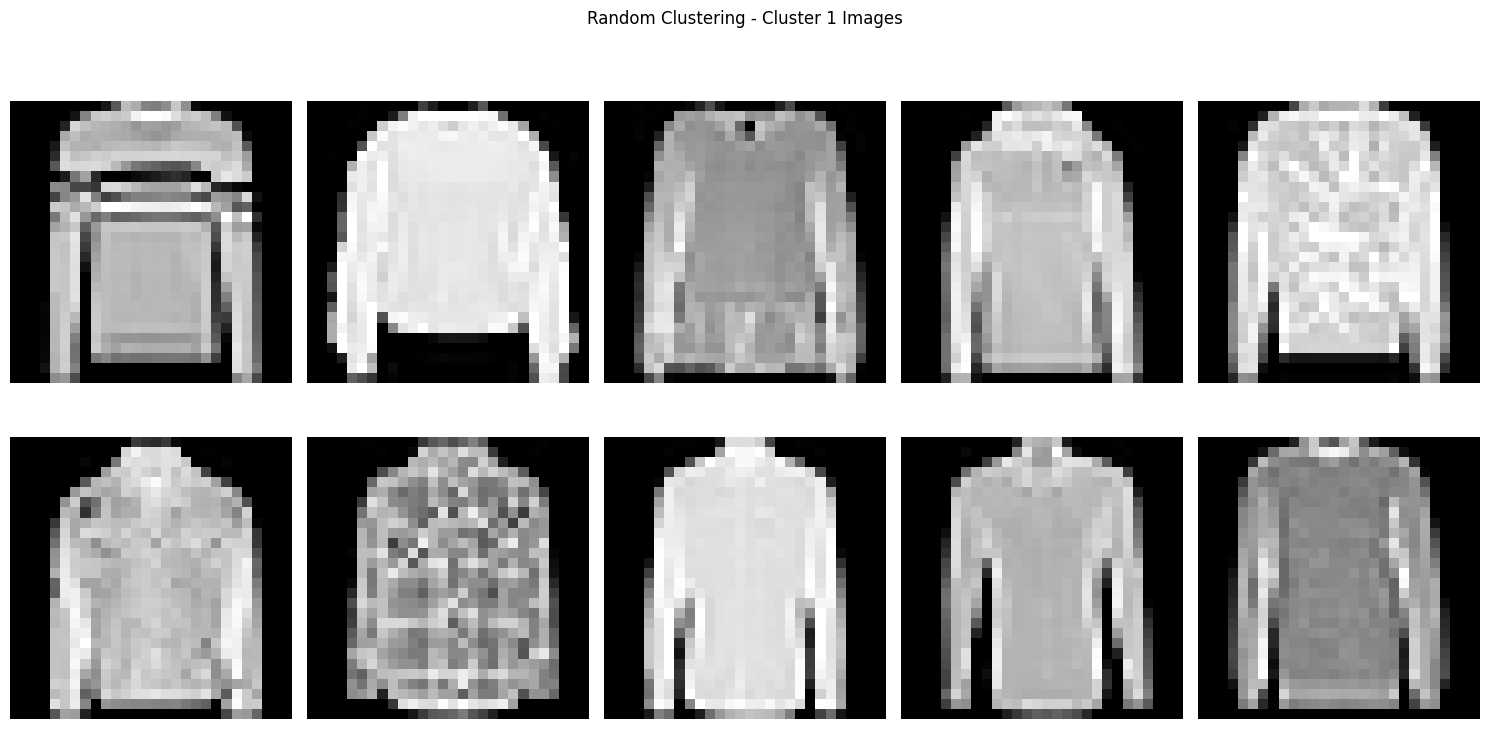

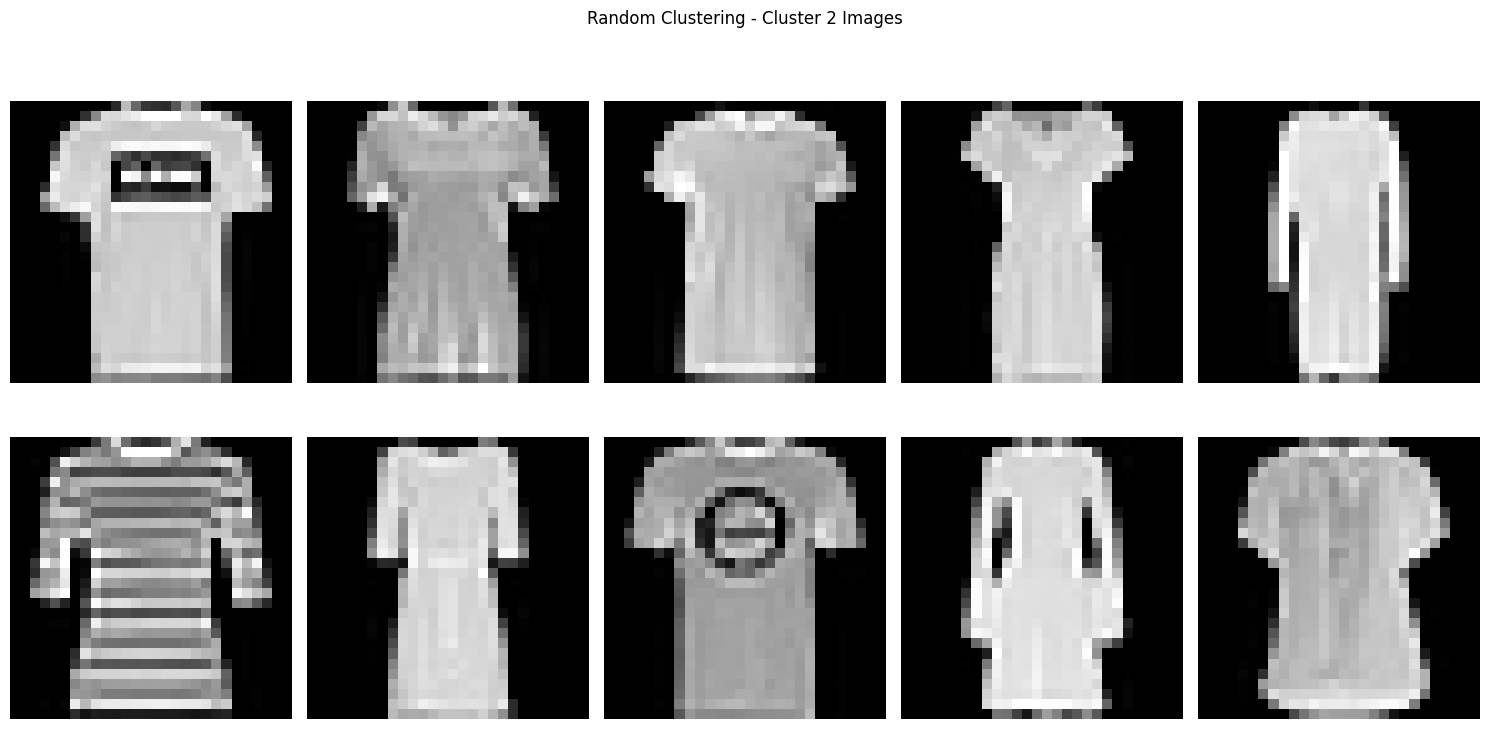

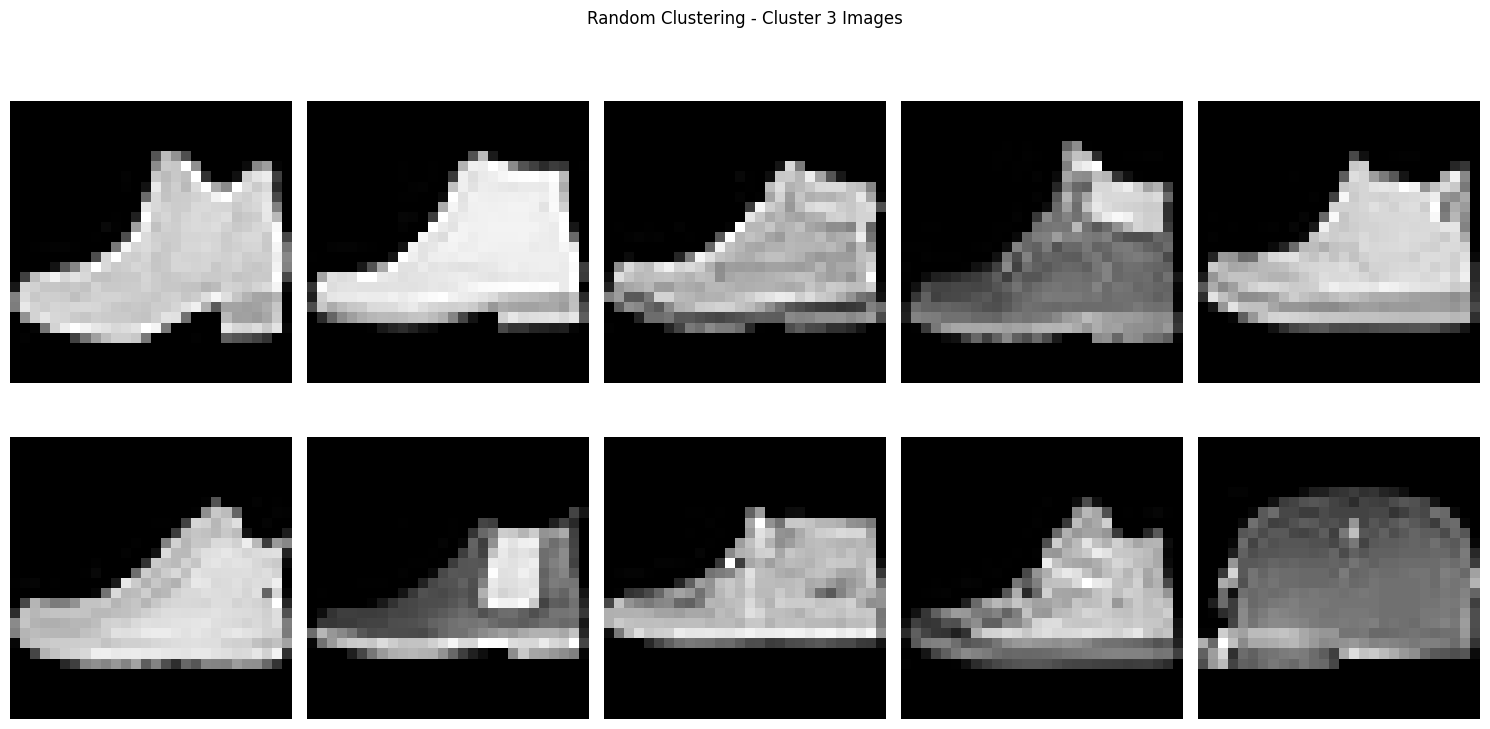

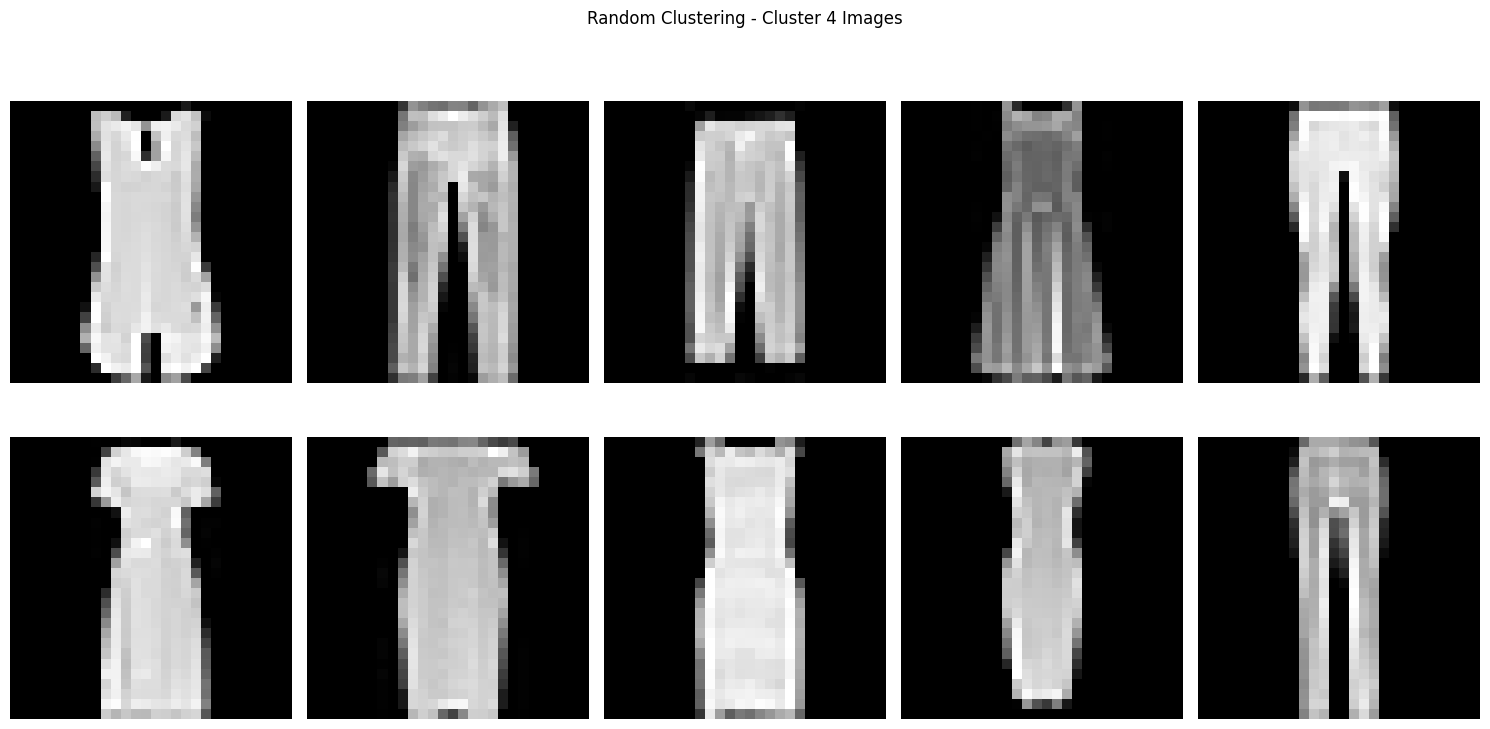

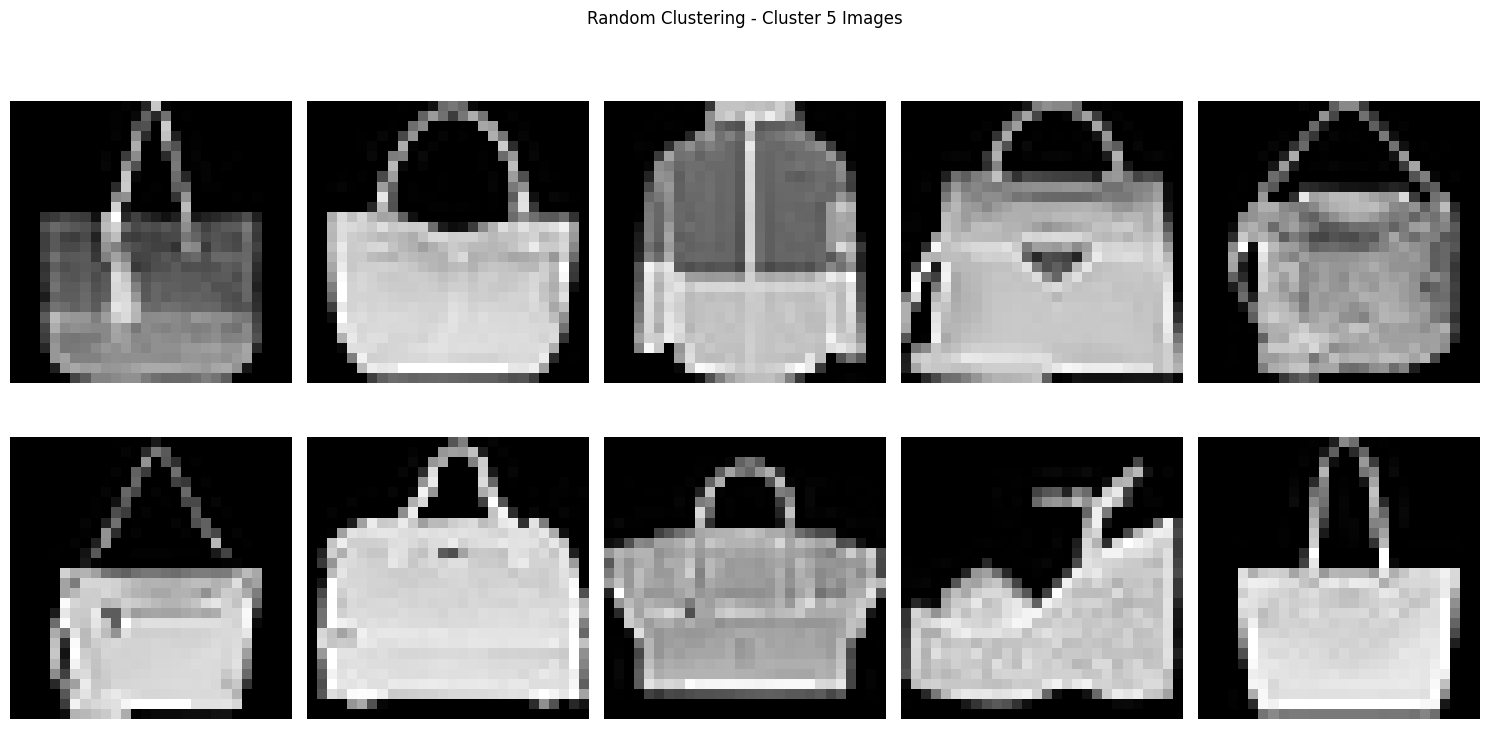

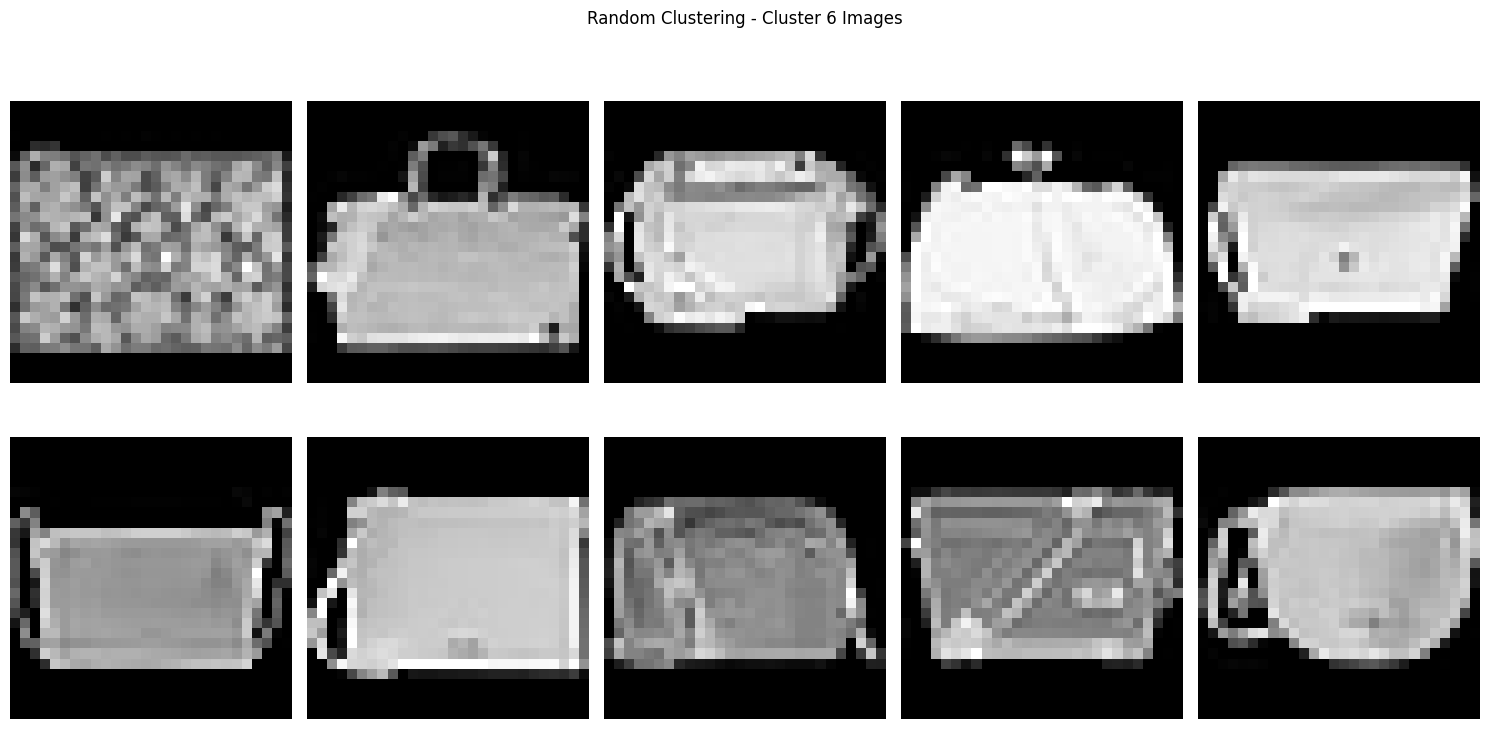

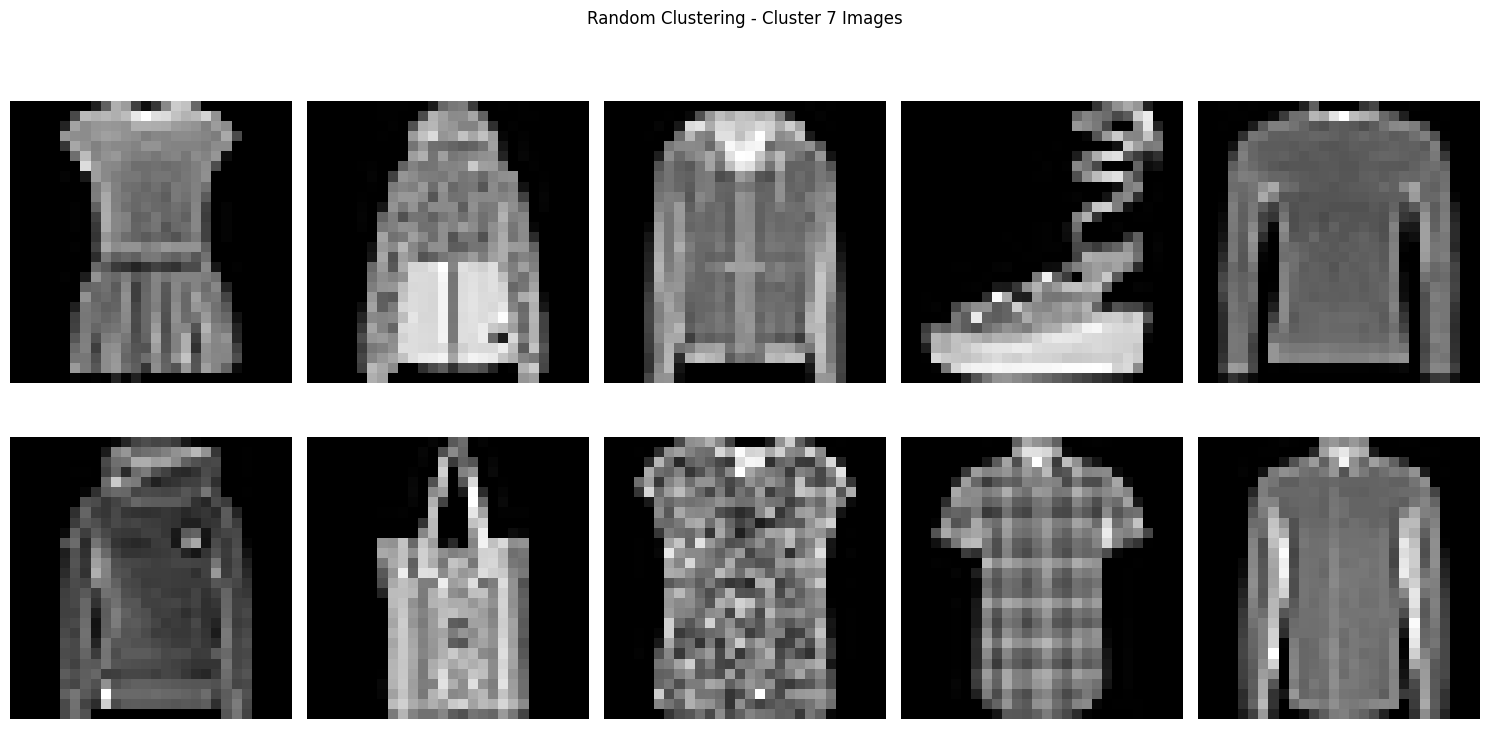

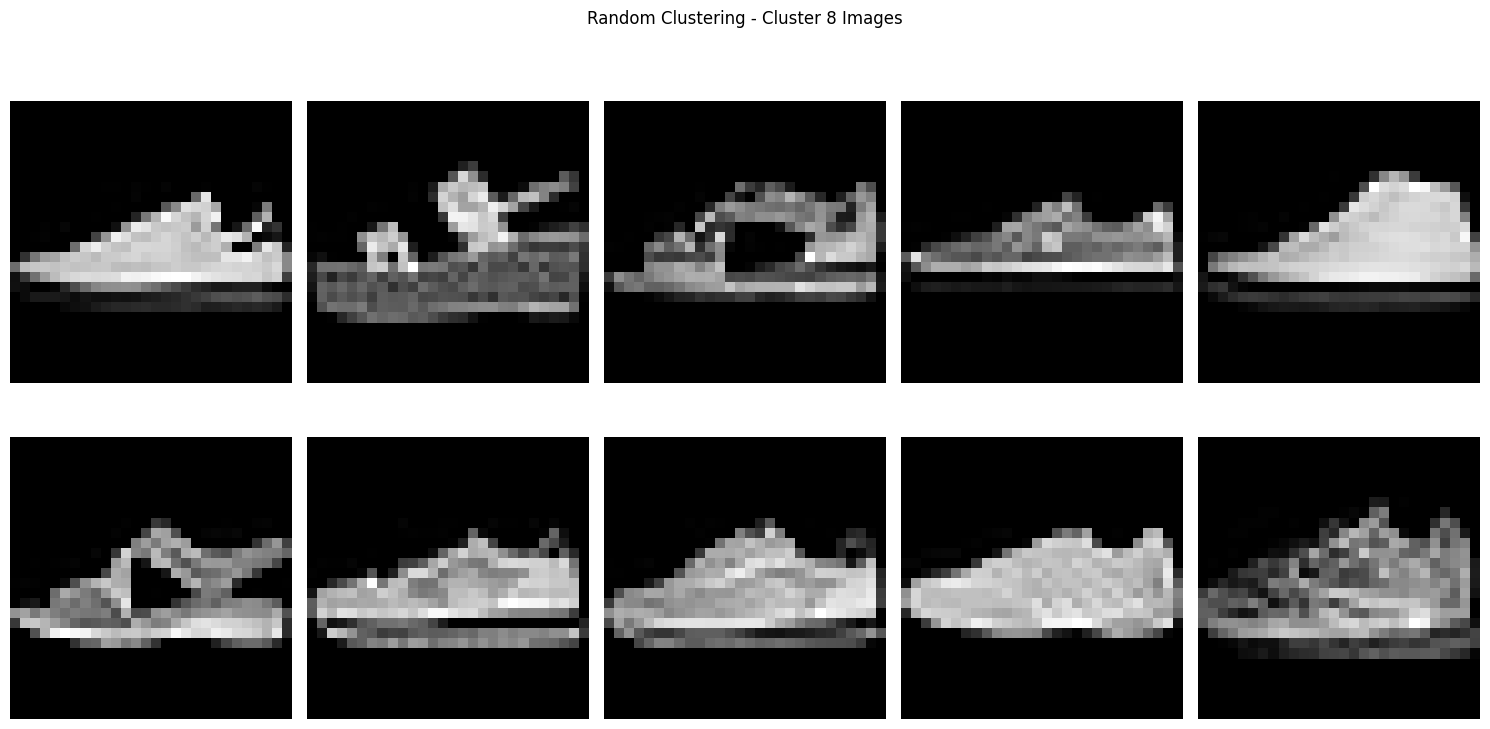

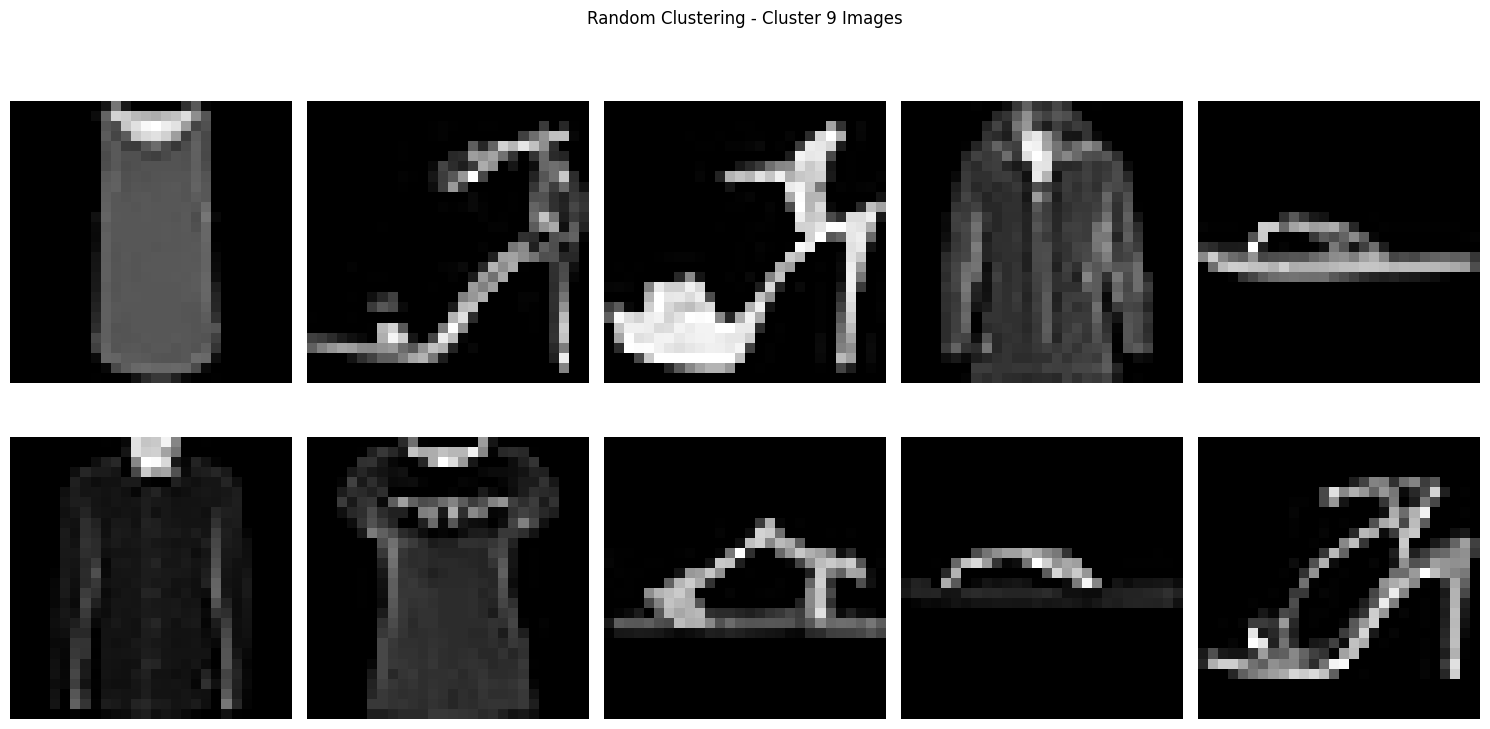

In [22]:
for cluster_idx in cluster_labels:
    plt.figure(figsize=(15, 8))
    cluster_indices = np.where(predicted_random_data == cluster_idx)[0]
    sample_indices = cluster_indices[:10] if len(cluster_indices) >= 10 else cluster_indices
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_train_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Random Clustering - Cluster {cluster_idx} Images")
    plt.tight_layout()

#### d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.

In [23]:
class_init = np.zeros((10, optimal_k))

for idx in range(10):
    class_indices = np.where(predicted_random_data == idx)[0]
    selected_indices = class_indices[:10]

    class_init[i] = np.mean(pca_train_data[selected_indices], axis=0)


kmeans_class = KMeans(n_clusters = 10,init=class_init,n_init=10)

kmeans_class.fit(pca_train_data)

predicted_class_data = kmeans_class.predict(pca_train_data)


/Users/fastasturtle/Documents/MTech/Assignment/ML/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1404: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
cluster_labels,cluster_counts = unique(predicted_random_data,return_counts=True)

for cluster_label, cluster_count in zip(cluster_labels, cluster_counts):
    print(f"Cluster {cluster_label}: {cluster_count} samples")



Cluster 0: 2898 samples
Cluster 1: 9619 samples
Cluster 2: 7392 samples
Cluster 3: 4294 samples
Cluster 4: 9077 samples
Cluster 5: 2571 samples
Cluster 6: 2346 samples
Cluster 7: 7467 samples
Cluster 8: 6574 samples
Cluster 9: 7762 samples


#### e) Visualize 10 images corresponding to each cluster.

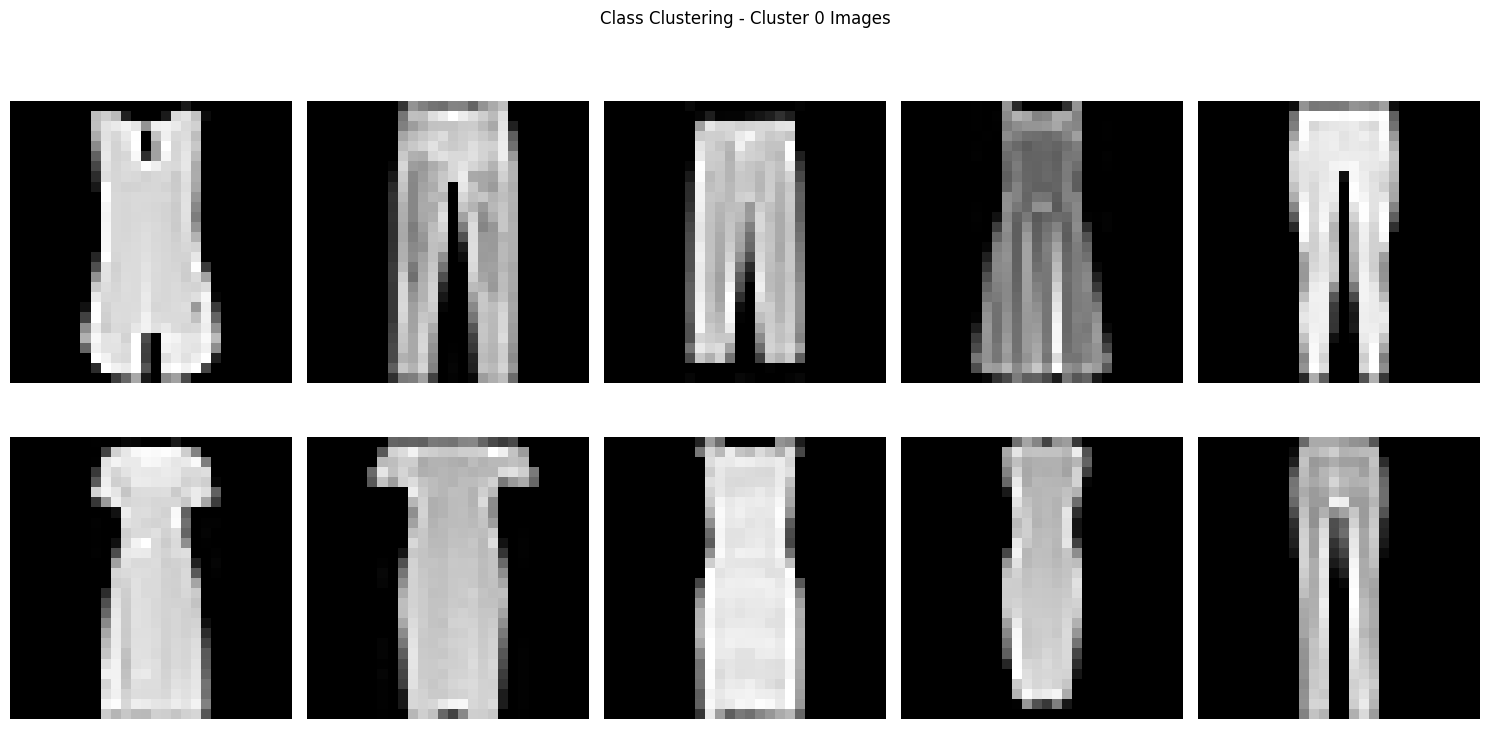

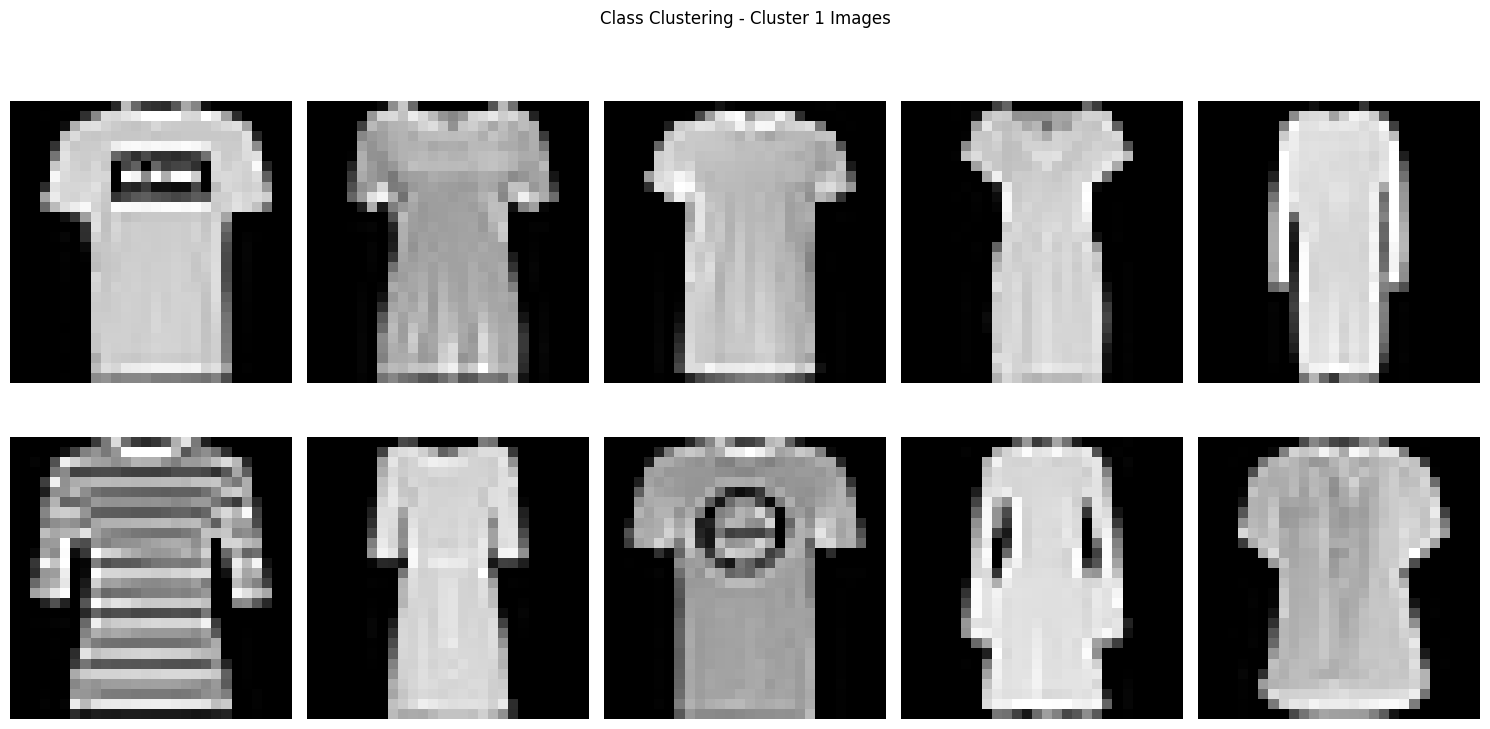

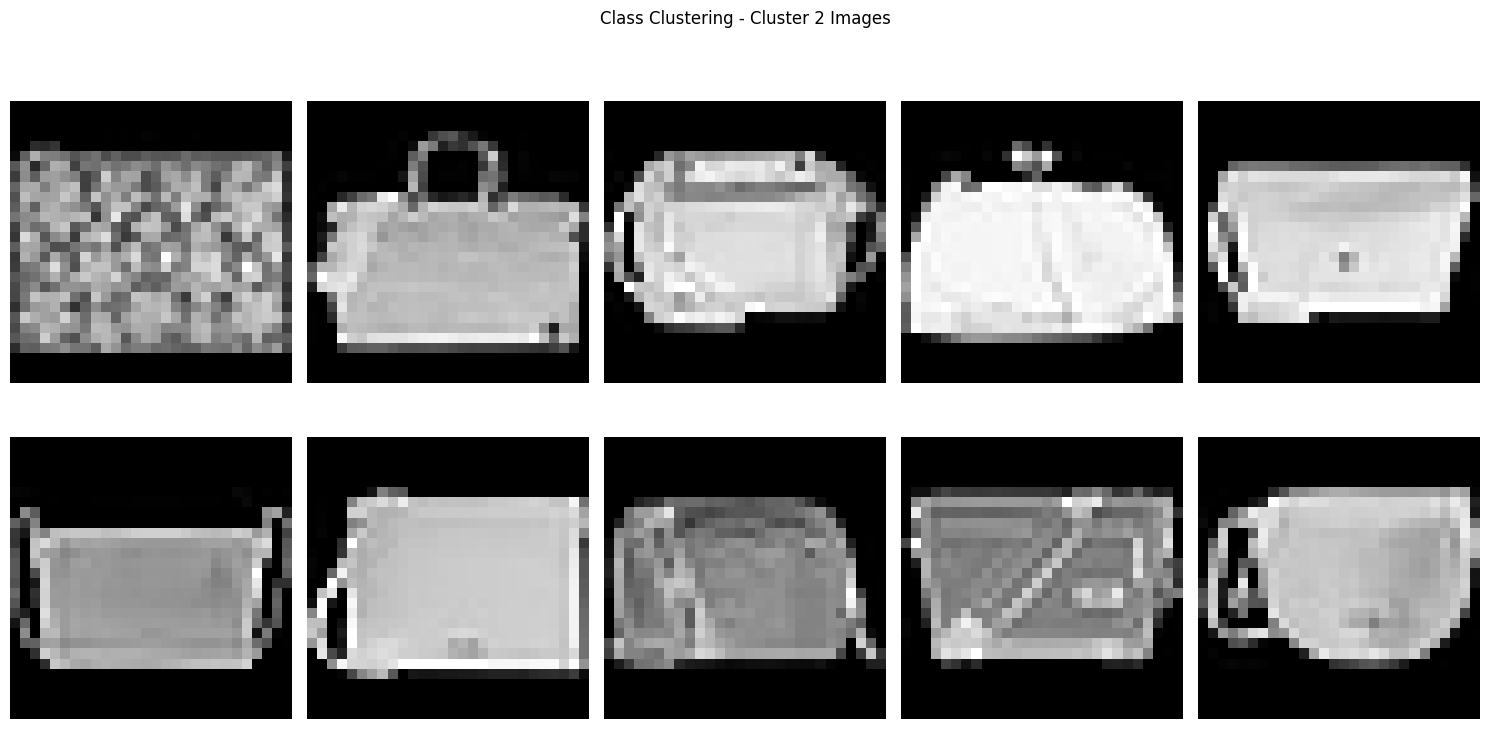

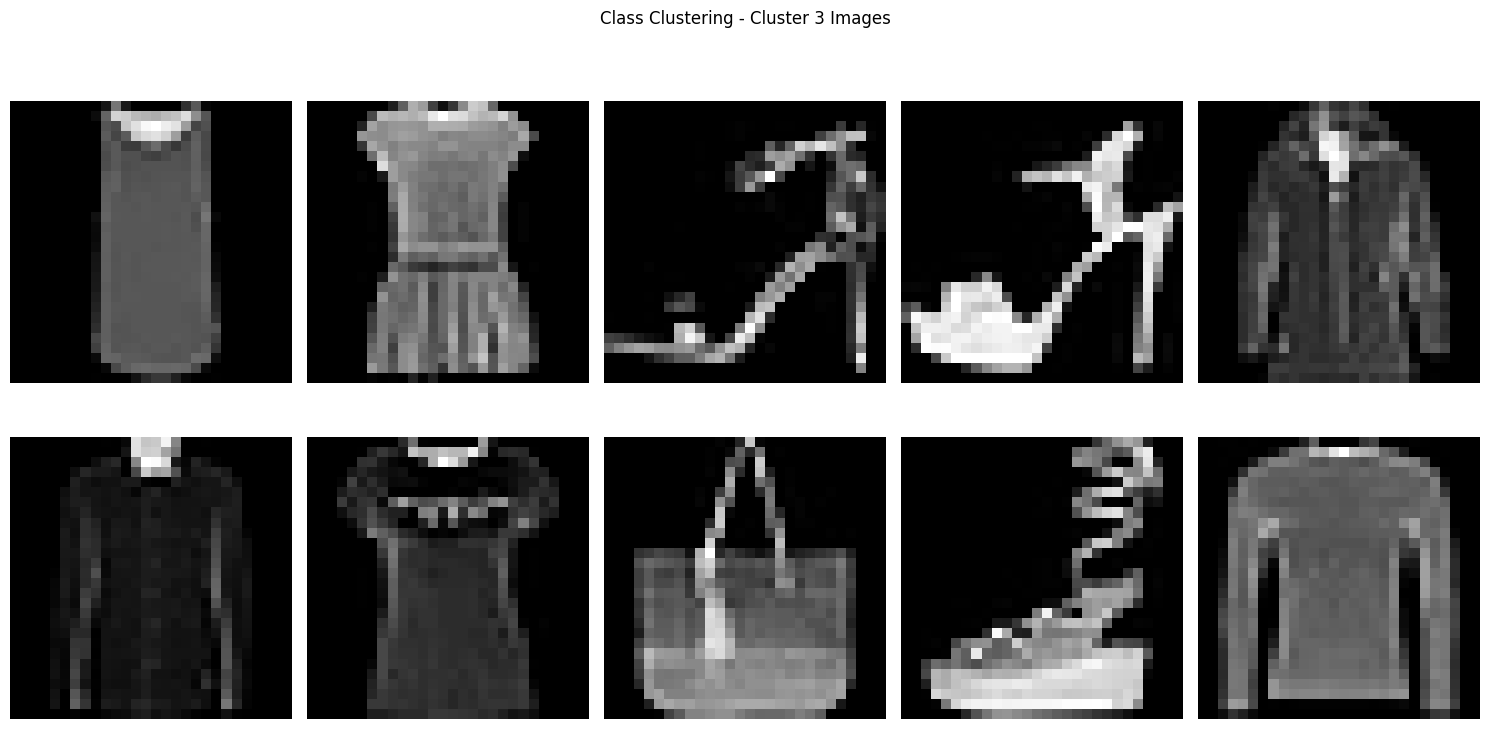

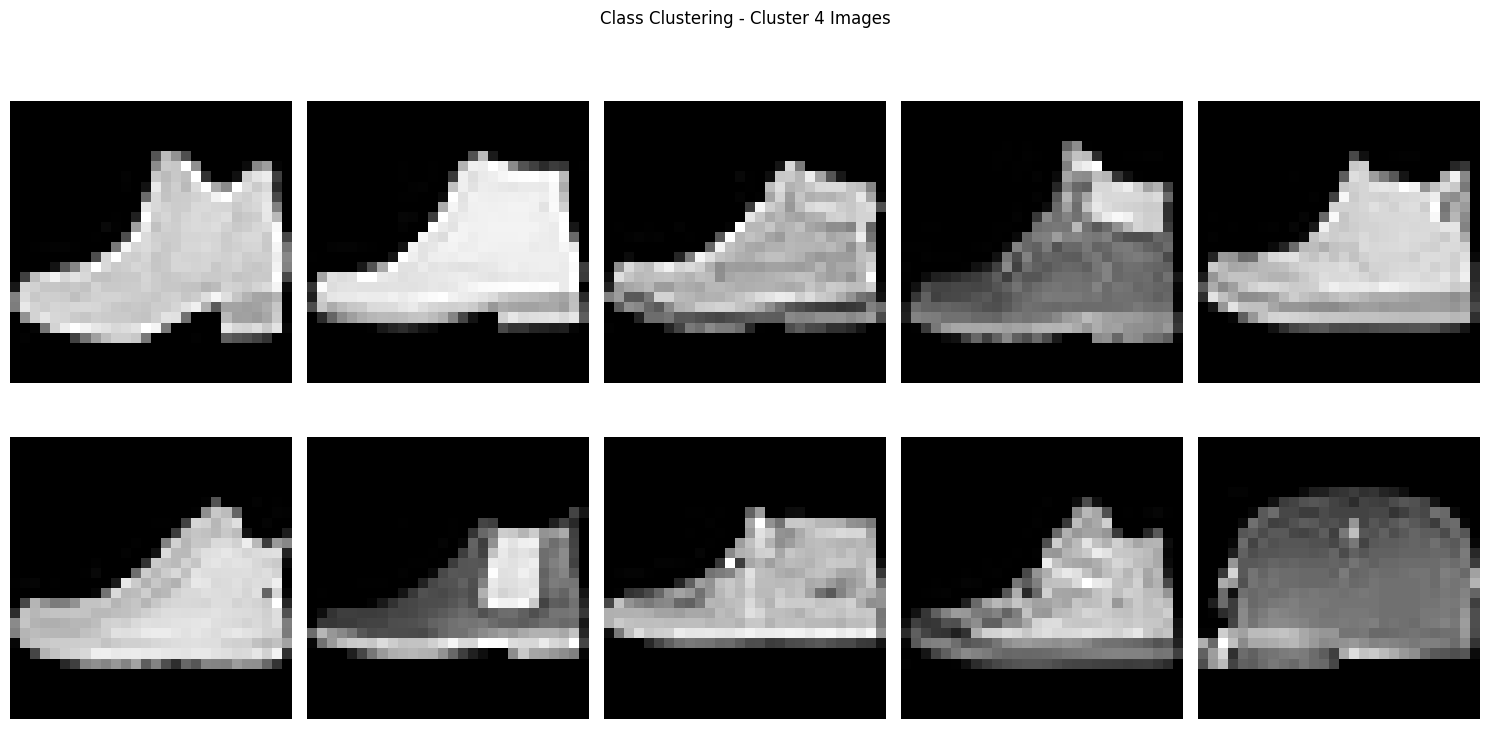

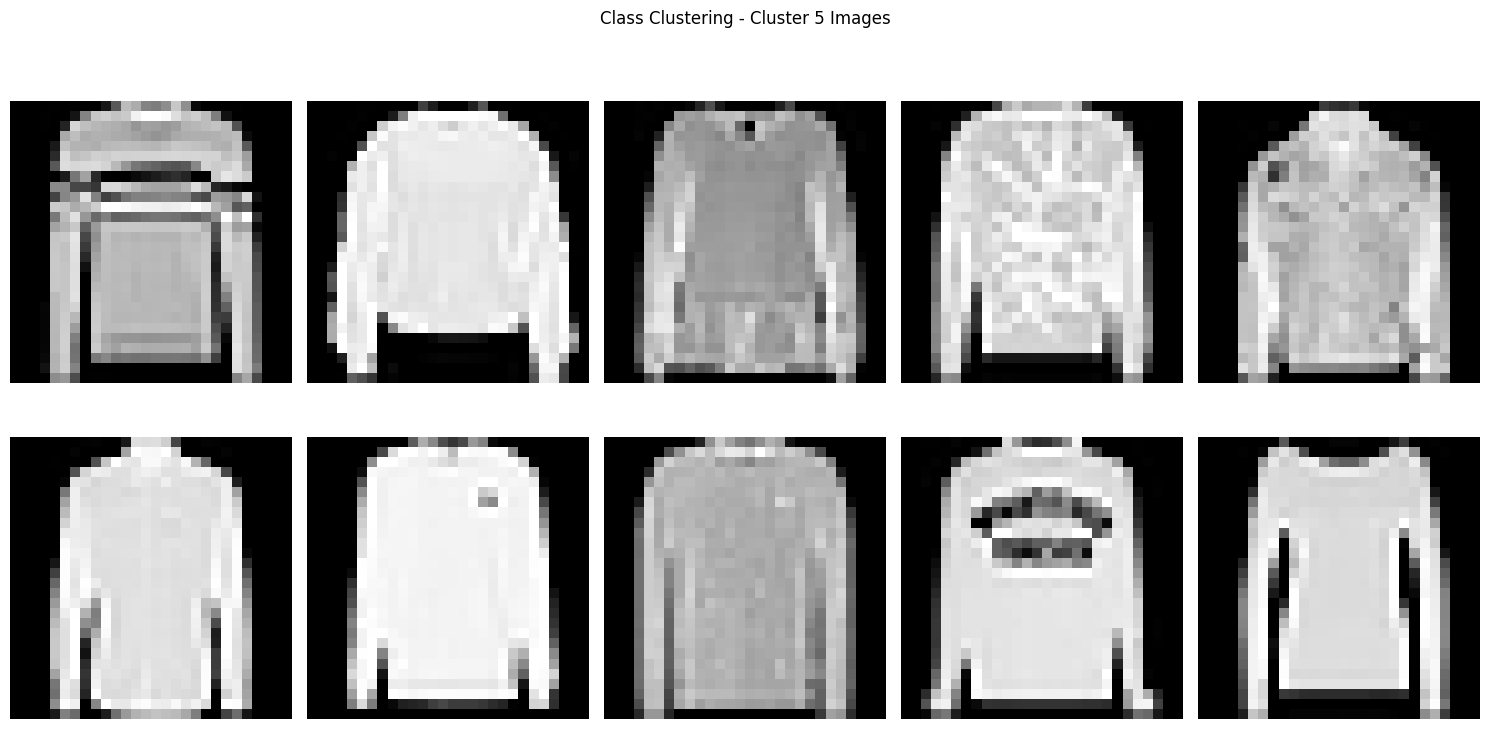

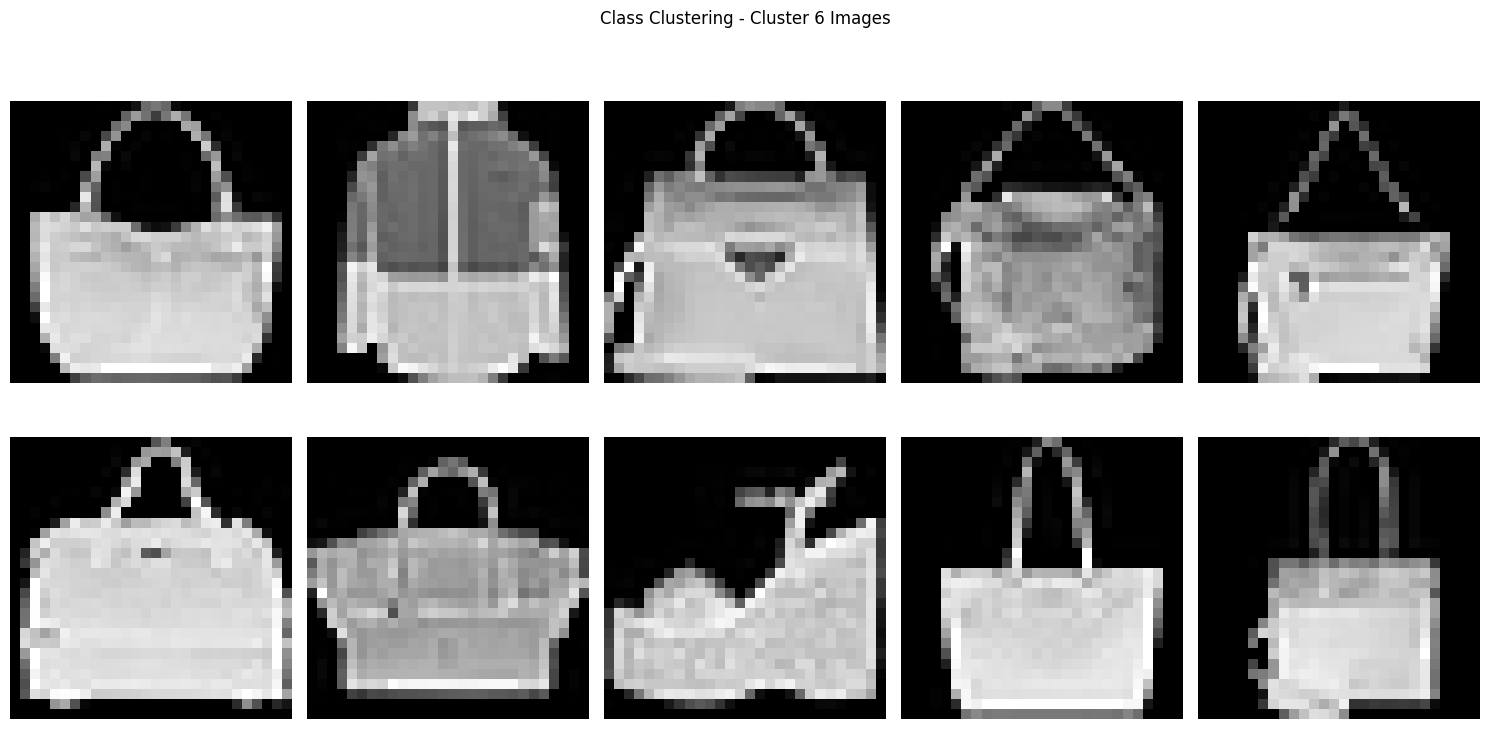

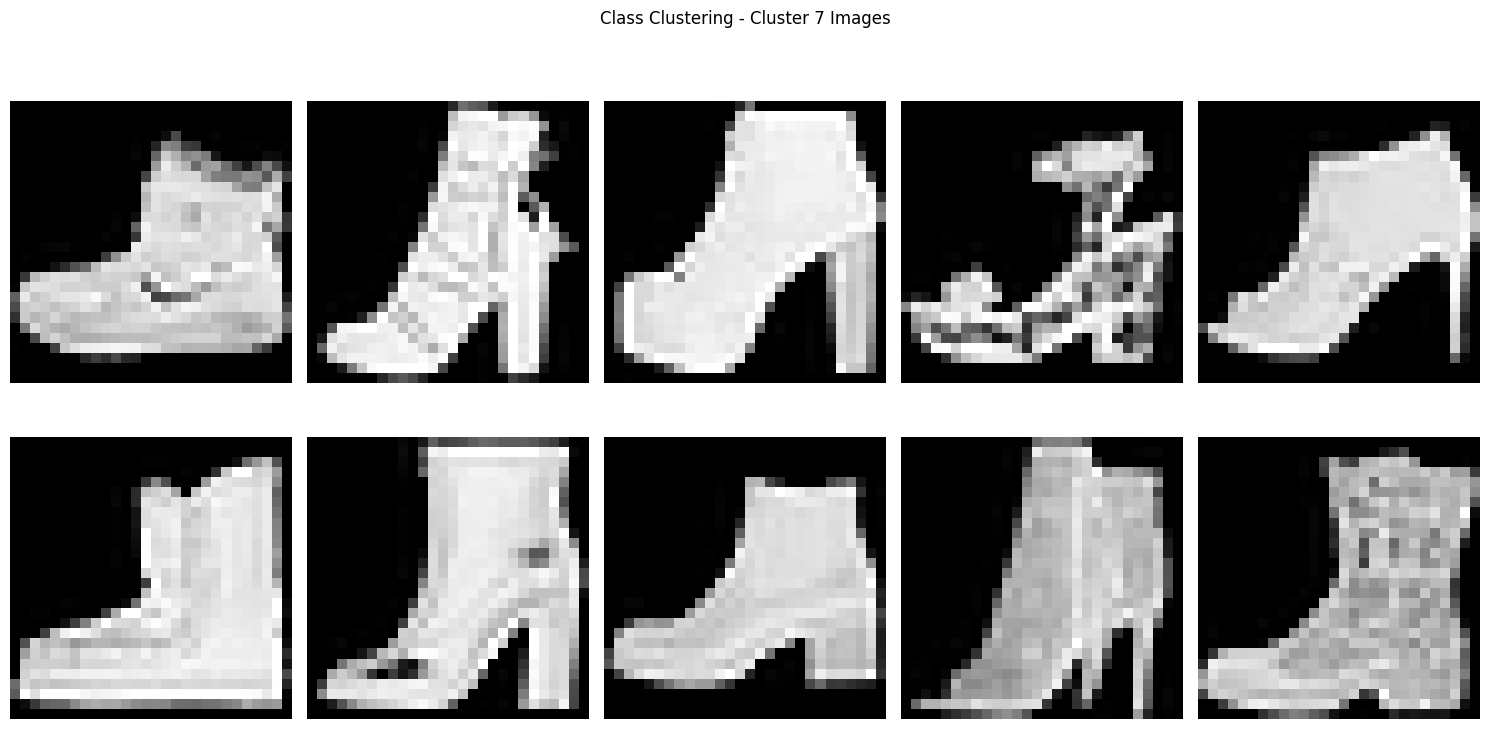

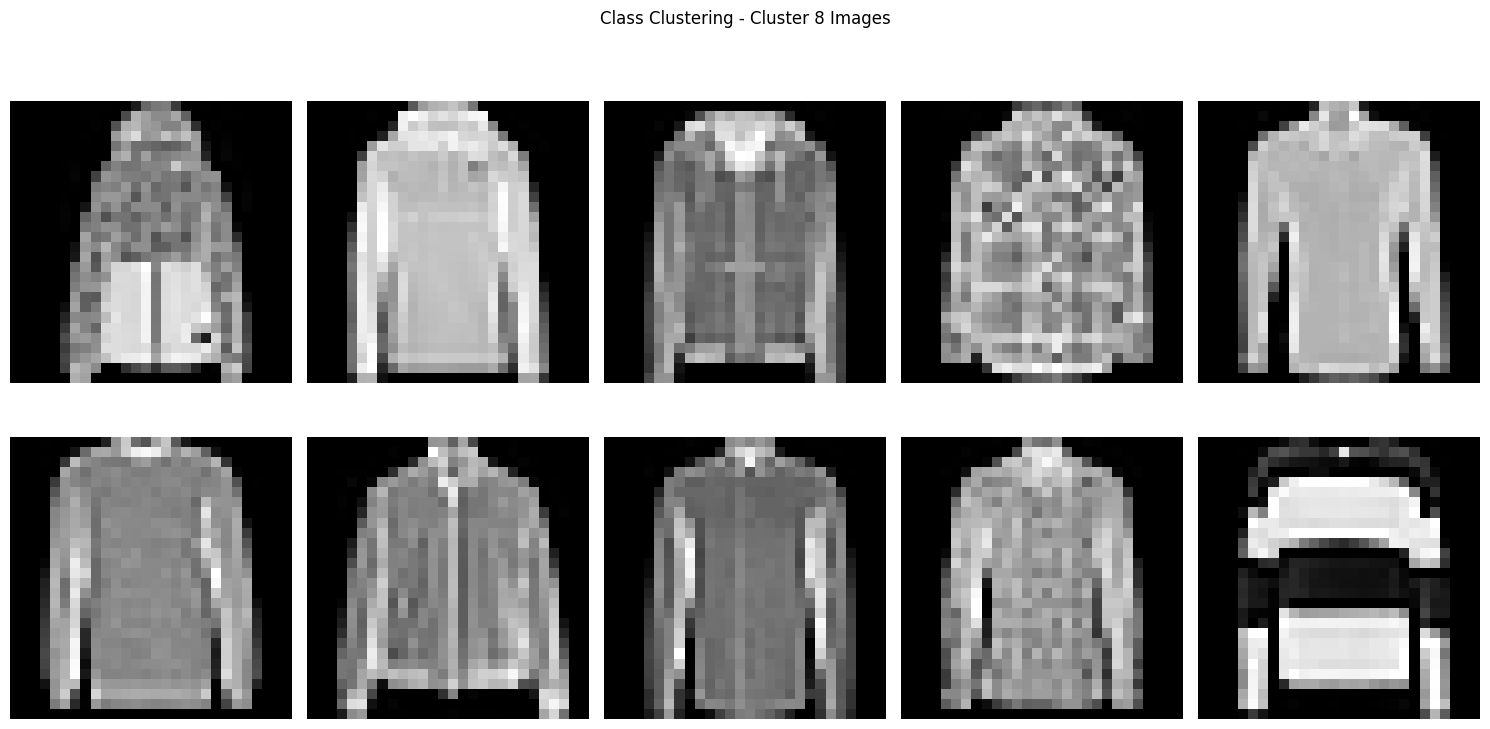

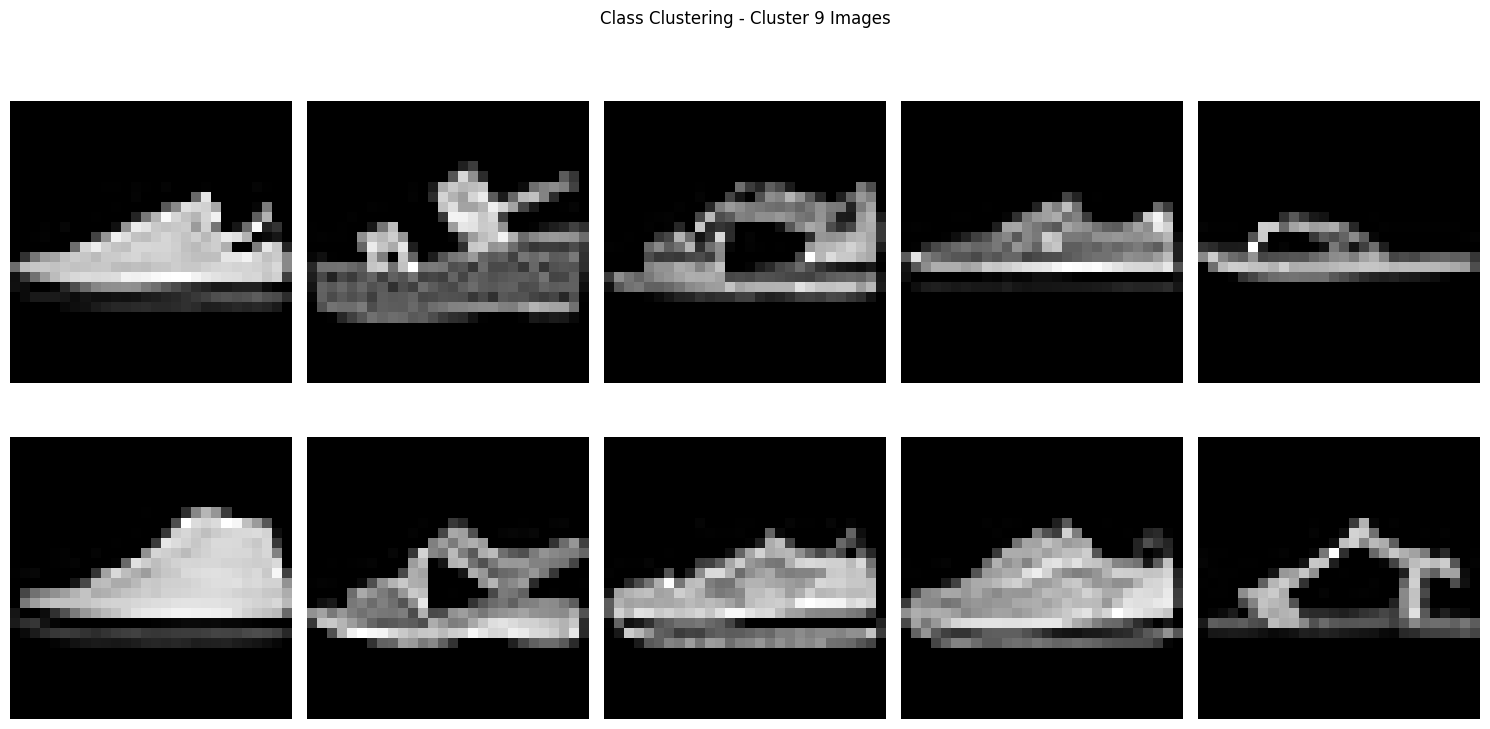

In [25]:
for cluster_idx in cluster_labels:
    plt.figure(figsize=(15, 8))
    cluster_indices = np.where(predicted_class_data == cluster_idx)[0]
    sample_indices = cluster_indices[:10] if len(cluster_indices) >= 10 else cluster_indices
    
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_train_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Class Clustering - Cluster {cluster_idx} Images")
    plt.tight_layout()

#### f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering

Random initialization produced better clustering.


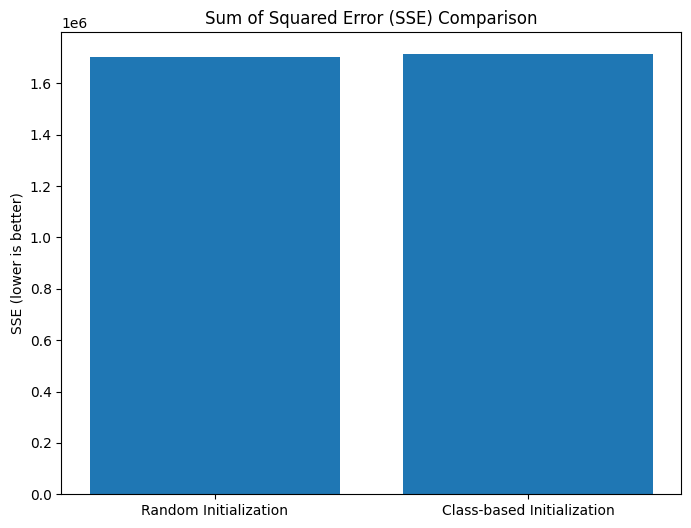

In [26]:
sse_random = kmeans.inertia_
sse_class = kmeans_class.inertia_

if sse_random < sse_class:
    print("Random initialization produced better clustering.")
else:
    print("Class-based initialization produced better clustering.")

plt.figure(figsize=(8, 6))
plt.bar(['Random Initialization', 'Class-based Initialization'], [sse_random, sse_class])
plt.title('Sum of Squared Error (SSE) Comparison')
plt.ylabel('SSE (lower is better)')
plt.show()

#### Implementation of Neural Networks from Scratch Using NumPy and Comparison with sklearn
##### a) Load and preprocess the MNIST Digits Dataset.
##### b) Implement a neural network with one input layer, one hidden layer, and one output layer using NumPy.
##### c) Train the neural network with various hyperparameters (e.g., learning rate, number of hidden nodes).
##### d) Evaluate the performance of the neural network on the testing set.
##### e) Implement the same neural network using sklearn and compare the results with the NumPy implementation.
##### f) Plot the training and validation loss/accuracy curves (for both experiments). (3 marks)

In [27]:
digit_dataset = fetch_openml("mnist_784")

In [28]:
data, target = digit_dataset.data, digit_dataset.target
data = data.astype('uint8')
digit_train_data, digit_test_data,digit_train_target_data, digit_test_target_data =  train_test_split(data, target, test_size=0.2, random_state=42)

In [29]:
pca = PCA(n_components=784).fit(digit_train_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_k = argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components (k) for 95% variance: {optimal_k}")

Optimal number of components (k) for 95% variance: 154


In [30]:
pca = PCA(n_components=optimal_k)
pca_digit_train_data = pca.fit_transform(digit_train_data)
pca_digit_test_data = pca.transform(digit_test_data)

##### b) Implement a neural network with one input layer, one hidden layer, and one output layer using NumPy.


##### We have used relu for input and hidden layers and softmax for the output layers, as it is best for multi-class clasification as it gives probability as an activation output

In [31]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_size, output_size,learning_rate = 0.01):
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.randn(input_size, hidden_layer_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_layer_size))
        self.weights_hidden_output = np.random.randn(hidden_layer_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1.0, 0.0)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def softmax_derivative(self, z):
        s = self.softmax(z)
        return s * (1 - s)


    def forward_pass(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.softmax(self.output_layer_input)
        return self.output_layer_output

    def compute_loss(self, predictions, true_labels):
        num_samples = true_labels.shape[0]
        log_probs = -np.log(predictions[range(num_samples), true_labels])
        loss = np.sum(log_probs) / num_samples
        return loss

    def backward_pass(self, inputs, true_labels):
        num_samples = inputs.shape[0]

        output_error = self.output_layer_output.copy()
        output_error[range(num_samples), true_labels] -= 1
        output_error /= num_samples

        gradient_weights_hidden_output = np.dot(self.hidden_layer_output.T, output_error)
        gradient_bias_output = np.sum(output_error, axis=0, keepdims=True)

        hidden_error = np.dot(output_error, self.weights_hidden_output.T)
        hidden_error *= self.relu_derivative(self.hidden_layer_input)

        gradient_weights_input_hidden = np.dot(inputs.T, hidden_error)
        gradient_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True)

        self.weights_hidden_output -= self.learning_rate * gradient_weights_hidden_output
        self.bias_output -= self.learning_rate * gradient_bias_output
        self.weights_input_hidden -= self.learning_rate * gradient_weights_input_hidden
        self.bias_hidden -= self.learning_rate * gradient_bias_hidden

    def train(self, inputs, labels, epochs):

        for epoch in range(epochs):
            predictions = self.forward_pass(inputs)
            loss = self.compute_loss(predictions, labels)

            self.backward_pass(inputs, labels)

            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

        
        self.loss = loss
    

    def predict(self, inputs):

        outputs = self.forward_pass(inputs)
        return np.argmax(outputs, axis=1)

##### c) Train the neural network with various hyperparameters (e.g., learning rate, number of hidden nodes).


In [32]:
network = NeuralNetwork(input_size=optimal_k, hidden_layer_size=100, output_size=10,learning_rate=0.01)

In [33]:
network.train(pca_digit_train_data, digit_train_target_data.astype(int), epochs=100)


Epoch 1, Loss: 2.8836
Epoch 2, Loss: 1.3586
Epoch 3, Loss: 2.3049
Epoch 4, Loss: 2.4611
Epoch 5, Loss: 3.1425
Epoch 6, Loss: 3.0490
Epoch 7, Loss: 1.6917
Epoch 8, Loss: 1.5198
Epoch 9, Loss: 0.9208
Epoch 10, Loss: 1.4274
Epoch 11, Loss: 1.0661
Epoch 12, Loss: 0.6404
Epoch 13, Loss: 0.3961
Epoch 14, Loss: 0.3596
Epoch 15, Loss: 0.3388
Epoch 16, Loss: 0.3236
Epoch 17, Loss: 0.3117
Epoch 18, Loss: 0.3017
Epoch 19, Loss: 0.2931
Epoch 20, Loss: 0.2854
Epoch 21, Loss: 0.2785
Epoch 22, Loss: 0.2721
Epoch 23, Loss: 0.2663
Epoch 24, Loss: 0.2609
Epoch 25, Loss: 0.2559
Epoch 26, Loss: 0.2512
Epoch 27, Loss: 0.2467
Epoch 28, Loss: 0.2426
Epoch 29, Loss: 0.2386
Epoch 30, Loss: 0.2348
Epoch 31, Loss: 0.2312
Epoch 32, Loss: 0.2278
Epoch 33, Loss: 0.2245
Epoch 34, Loss: 0.2213
Epoch 35, Loss: 0.2183
Epoch 36, Loss: 0.2154
Epoch 37, Loss: 0.2126
Epoch 38, Loss: 0.2099
Epoch 39, Loss: 0.2073
Epoch 40, Loss: 0.2048
Epoch 41, Loss: 0.2023
Epoch 42, Loss: 0.2000
Epoch 43, Loss: 0.1977
Epoch 44, Loss: 0.19

##### d) Evaluate the performance of the neural network on the testing set.

In [34]:
numpy_predictions = network.predict(pca_digit_test_data)
numpy_accuracy = accuracy_score(digit_test_target_data.astype(int), numpy_predictions)
numpy_classification_report = classification_report(digit_test_target_data.astype(int), numpy_predictions)
print(numpy_classification_report)


numpy_loss = network.loss

print(f"Test Loss: {numpy_loss:.4f}")
print(f"Test Accuracy: {numpy_accuracy:.4f}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.98      0.98      1600
           2       0.95      0.95      0.95      1380
           3       0.95      0.94      0.95      1433
           4       0.95      0.95      0.95      1295
           5       0.95      0.95      0.95      1273
           6       0.97      0.97      0.97      1396
           7       0.95      0.96      0.95      1503
           8       0.95      0.93      0.94      1357
           9       0.94      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Test Loss: 0.1266
Test Accuracy: 0.9560


##### e) Implement the same neural network using sklearn and compare the results with the NumPy implementation.

Sklearn Test Loss: 0.0811
Test Accuracy: 0.9632
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.94      0.97      0.95      1380
           3       0.97      0.94      0.95      1433
           4       0.97      0.95      0.96      1295
           5       0.93      0.98      0.95      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.97      0.92      0.94      1357
           9       0.94      0.97      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



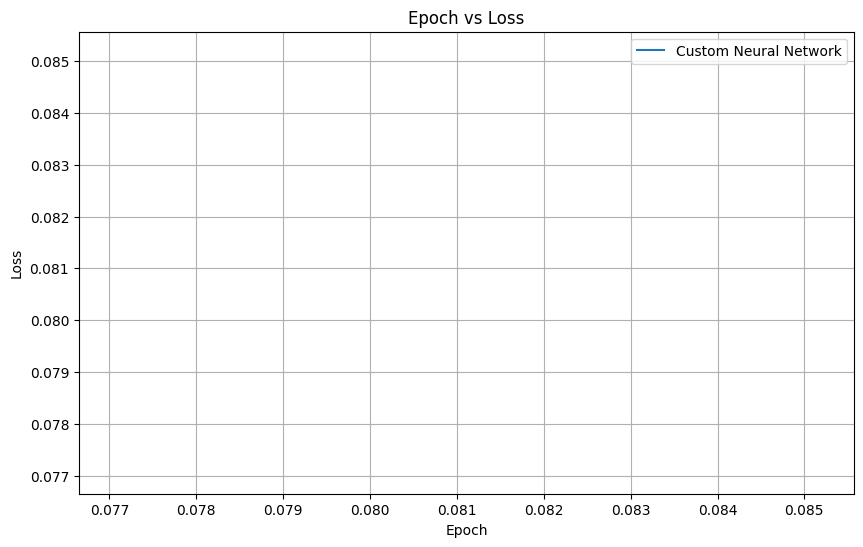

In [35]:
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)
sklearn_model = classifier.fit(pca_digit_train_data, digit_train_target_data.astype(int))
predictions = classifier.predict(pca_digit_test_data)
sklearn_accuracy = accuracy_score(digit_test_target_data.astype(int), predictions)
sklearn_loss = classifier.loss_
print(f"Sklearn Test Loss: {sklearn_loss:.4f}")
print(f"Test Accuracy: {sklearn_accuracy:.4f}")

sklearn_report = classification_report(digit_test_target_data.astype(int), predictions, target_names=[str(i) for i in range(10)])

print("Classification Report:\n", sklearn_report)

sklearn_model.loss_
#plot training and validation epoch vs loss
plt.figure(figsize=(10, 6))
plt.plot(sklearn_model.loss_, classifier.loss_, label='Custom Neural Network')
#plt.plot(range(1, 101), classifier.loss_curve_, label='Sklearn MLPClassifier')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [36]:
plt.figure(figsize=(8, 6))
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

<Figure size 800x600 with 0 Axes>

##### f) Plot the training and validation loss/accuracy curves (for both experiments). (3 marks)

In [37]:
def plot_training_history(history, experiment_label):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title(f'{experiment_label} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{experiment_label} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history1, 'Custom Model')
plot_training_history(history2, 'Sklearn Model')

NameError: name 'history1' is not defined

Project:  Salary Prediction